# Description
This notebook makes diagnostic plots of the MCMC.

In [1]:
import arviz
import ipywidgets
import numpy
import pathlib
import pandas
from matplotlib import pyplot

import plotting

DP_PROCESSED = pathlib.Path("processed")

### Load posterior and plot

In [2]:
idata_full = arviz.from_netcdf(DP_PROCESSED / "full_posterior.nc")

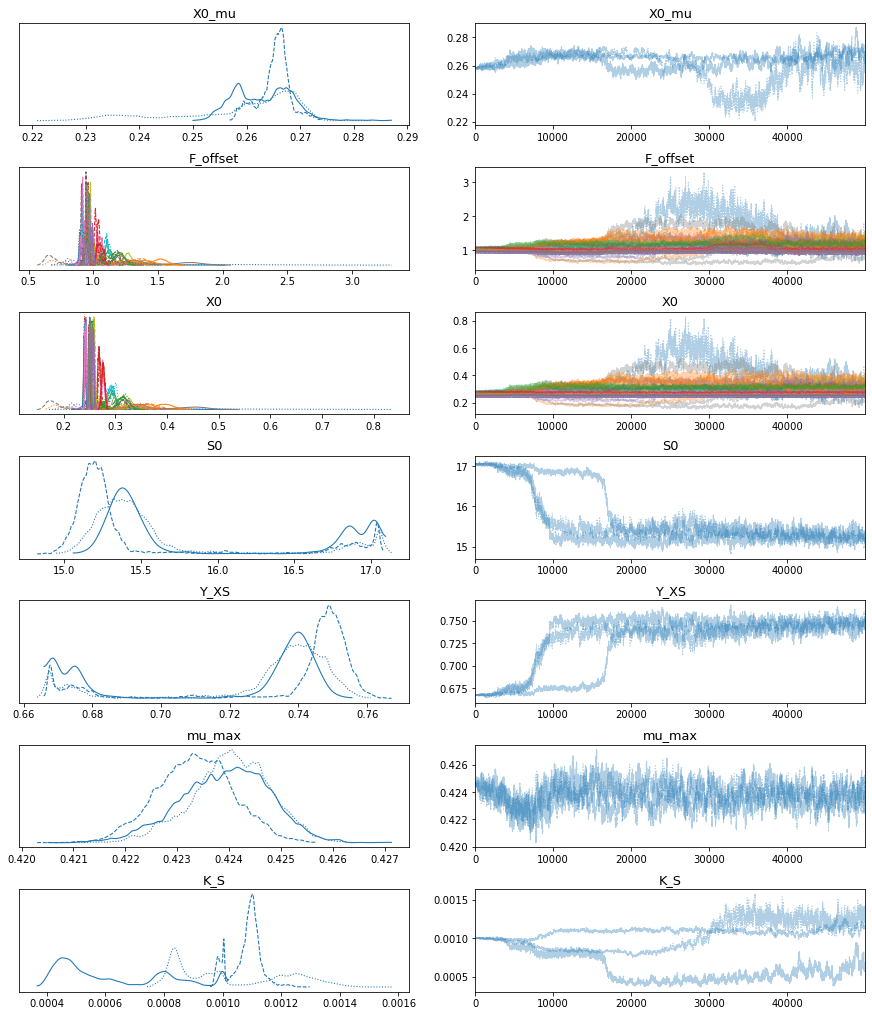

In [3]:
arviz.plot_trace(idata_full.warmup_posterior)
plotting.savefig(pyplot.gcf(), "4.2.3 traceplot_warmup")
pyplot.show()

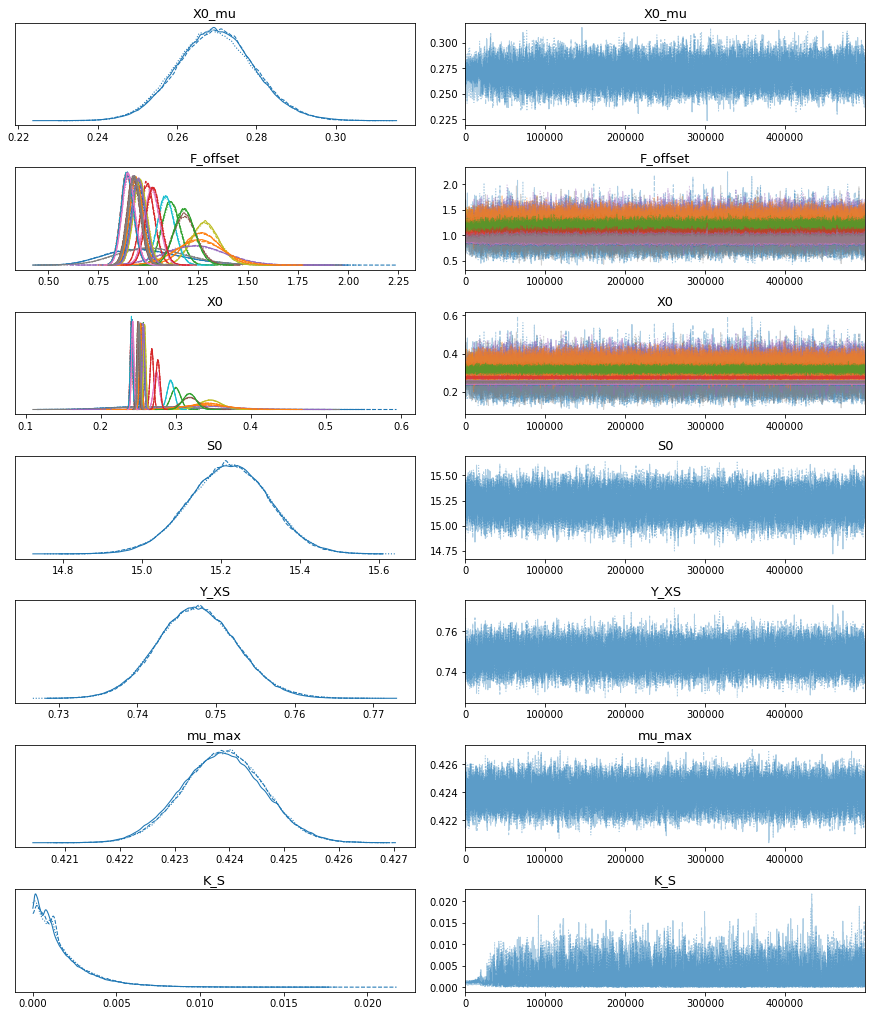

In [4]:
arviz.plot_trace(idata_full)
plotting.savefig(pyplot.gcf(), "4.2.3 traceplot_posterior")
pyplot.show()

In [5]:
df_summary = arviz.summary(idata_full)
df_summary.to_excel(DP_PROCESSED / "mcmc_diagnostics.xlsx")
df_summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
X0_mu,0.270,0.010,0.251,0.288,0.000,0.000,8083.0,8083.0,8076.0,17808.0,1.0
F_offset[0],0.990,0.192,0.645,1.351,0.002,0.001,8256.0,8256.0,8165.0,19338.0,1.0
F_offset[1],1.269,0.092,1.093,1.441,0.001,0.001,8206.0,8206.0,8191.0,16411.0,1.0
F_offset[2],1.114,0.047,1.027,1.203,0.001,0.000,8180.0,8180.0,8184.0,18815.0,1.0
F_offset[3],0.995,0.037,0.927,1.066,0.000,0.000,8221.0,8221.0,8223.0,18209.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
X0[27],0.251,0.002,0.248,0.254,0.000,0.000,8573.0,8573.0,8576.0,18188.0,1.0
S0,15.220,0.103,15.025,15.411,0.001,0.001,8618.0,8618.0,8630.0,17150.0,1.0
Y_XS,0.748,0.005,0.738,0.757,0.000,0.000,8589.0,8585.0,8616.0,16321.0,1.0
mu_max,0.424,0.001,0.422,0.425,0.000,0.000,8458.0,8457.0,8461.0,18303.0,1.0


### Analysis plot for DEMetropolisZ

In [6]:
def sample_stats_plot(sname: str = "accepted", rolling: bool = True):
    fig, ax = pyplot.subplots(figsize=(8, 6), ncols=1)
    idata = idata_full
    S = numpy.hstack(
        [
            idata.warmup_sample_stats[sname].sel(chain=0),
            idata.sample_stats[sname].sel(chain=0),
        ]
    )
    for c in range(idata.posterior.dims["chain"]):
        y = (
            pandas.Series(S).rolling(window=500).mean().iloc[500 - 1 :].values
            if rolling
            else S
        )
        ax.plot(y, linewidth=0.5)
    return


ipywidgets.interact(
    sample_stats_plot, sname=idata_full.sample_stats.keys(), rolling=True
)

interactive(children=(Dropdown(description='sname', index=1, options=('scaling', 'accepted', 'lambda', 'accept…

<function __main__.sample_stats_plot(sname: str = 'accepted', rolling: bool = True)>

In [7]:
%load_ext watermark
%watermark

Last updated: 2021-12-15T23:49:35.949552+01:00

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.24.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 6
Architecture: 64bit

